In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('final_list_houses_dataset.csv', index_col='Unnamed: 0')
print(df.shape)
df.head().T
# columns to drop: kitchen, furnished, open fire, terrace, garden 

(10092, 17)


,0,3,4,5,6
Area [m²],123.0,255.0,234.0,219.0,156.0
Price [€],200000,698000,499000,717000,429000
state of the building,good,just renovated,as new,as new,good
number of facades,3.0,4.0,NaN,NaN,4.0
number of bedrooms,2.0,4.0,5.0,4.0,4.0
fully equipped kitchen,installed,installed,NaN,NaN,installed
furnished,no,no,NaN,no,no
open fire,NaN,NaN,NaN,NaN,NaN
locality [zip code],3294,2070,8800,8000,8800
surface of the land [m²],429.0,1210.0,744.0,760.0,419.0


# Step 1: data cleaning

In [34]:
df.columns

Index(['Area [m²]', 'Price [€]', 'state of the building', 'number of facades',
       'number of bedrooms', 'fully equipped kitchen', 'furnished',
       'open fire', 'locality [zip code]', 'surface of the land [m²]',
       'terrace', 'terrace surface [m²]', 'swimming pool', 'type of property',
       'subtype of property', 'garden', 'garden surface [m²]'],
      dtype='object')

In [35]:
# drop coumns
df1 = df.drop(['fully equipped kitchen', 'furnished','open fire','terrace', 'terrace surface [m²]','type of property','garden', 'garden surface [m²]'],
       axis=1)
df1.head().T

,0,3,4,5,6
Area [m²],123.0,255.0,234.0,219.0,156.0
Price [€],200000,698000,499000,717000,429000
state of the building,good,just renovated,as new,as new,good
number of facades,3.0,4.0,NaN,NaN,4.0
number of bedrooms,2.0,4.0,5.0,4.0,4.0
locality [zip code],3294,2070,8800,8000,8800
surface of the land [m²],429.0,1210.0,744.0,760.0,419.0
swimming pool,NaN,NaN,NaN,NaN,NaN
subtype of property,house,villa,villa,house,villa


In [36]:
 # rename columns
df1.rename(columns={'Area [m²]': 'area', 
                   'Price [€]': 'price', 
                   'state of the building': 'status',
                   'number of facades': 'facades', 
                   'number of bedrooms': 'bedrooms',
                    'locality [zip code]': 'postcode',
                   'surface of the land [m²]': 'land',
                   'swimming pool': 'pool',
                   'subtype of property': 'subtype'} , 
          inplace=True)
df1.head()

,area,price,status,facades,bedrooms,postcode,land,pool,subtype
0,123.0,200000,good,3.0,2.0,3294,429.0,NaN,house
3,255.0,698000,just renovated,4.0,4.0,2070,1210.0,NaN,villa
4,234.0,499000,as new,NaN,5.0,8800,744.0,NaN,villa
5,219.0,717000,as new,NaN,4.0,8000,760.0,NaN,house
6,156.0,429000,good,4.0,4.0,8800,419.0,NaN,villa


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10092 entries, 0 to 11382
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      8356 non-null   float64
 1   price     10092 non-null  object 
 2   status    6976 non-null   object 
 3   facades   7754 non-null   float64
 4   bedrooms  9940 non-null   float64
 5   postcode  10092 non-null  int64  
 6   land      10092 non-null  float64
 7   pool      400 non-null    object 
 8   subtype   10092 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 788.4+ KB


In [42]:
df1.iloc[166,:]

area                129.0
price                  no
status      to be done up
facades               NaN
bedrooms              3.0
postcode             8380
land                249.0
pool                  NaN
subtype             house
Name: 181, dtype: object

In [45]:
df1 = df1[df1.price!= 'no']

In [47]:
df1["price"] = pd.to_numeric(df1["price"])
df1.dtypes

<ipython-input-47-3fd2328e2bf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["price"] = pd.to_numeric(df1["price"])


area        float64
price         int64
status       object
facades     float64
bedrooms    float64
postcode      int64
land        float64
pool         object
subtype      object
dtype: object

In [51]:
df1.isnull().sum()*100/len(df1)

area        17.150527
price        0.000000
status      30.811294
facades     23.155697
bedrooms     1.501293
postcode     0.000000
land         0.000000
pool        96.023066
subtype      0.000000
dtype: float64

In [54]:
df1.duplicated().sum()

337

In [57]:
mask = df1.duplicated()
df1[mask]

,area,price,status,facades,bedrooms,postcode,land,pool,subtype
260,NaN,238250,NaN,NaN,3.0,3680,238.0,NaN,house
545,135.0,275000,NaN,3.0,3.0,9600,537.0,NaN,house
636,NaN,405000,as new,2.0,4.0,2800,192.0,NaN,house
768,129.0,238000,NaN,NaN,4.0,8800,137.0,NaN,house
820,150.0,315000,as new,3.0,3.0,9600,459.0,NaN,house
...,...,...,...,...,...,...,...,...,...
11178,NaN,229000,NaN,NaN,NaN,8420,540.0,NaN,building
11193,146.0,249000,as new,2.0,4.0,9900,178.0,NaN,house
11201,642.0,1495000,good,NaN,3.0,8470,5924.0,NaN,villa
11257,115.0,240500,NaN,2.0,3.0,7812,312.0,NaN,house


In [58]:
df1.shape

(10058, 9)

In [60]:
df1 = df1.drop_duplicates()
df1.shape

(9721, 9)

In [61]:
df1.duplicated().any()

False

In [62]:
df1.isnull().sum()

area        1655
price          0
status      2881
facades     2179
bedrooms     139
postcode       0
land           0
pool        9327
subtype        0
dtype: int64

In [77]:
df1 = df1.dropna(subset=['area','bedrooms'],  how='all')

In [94]:
df1.isnull().sum()

area           0
price          0
status         0
facades     1560
bedrooms       0
postcode       0
land           0
pool           0
subtype        0
dtype: int64

In [80]:
df1['status'].fillna('not specified', inplace=True)

In [91]:
df1['pool'] = df1['pool'].fillna(0)
df1['pool'] = df1['pool'].replace(True, 1)

In [93]:
df1['pool'] = df1['pool'].astype('bool')
df1.dtypes

area        float64
price         int64
status       object
facades     float64
bedrooms    float64
postcode      int64
land        float64
pool           bool
subtype      object
dtype: object

In [102]:
df2 = df1.drop('facades', axis=1)

<AxesSubplot:>

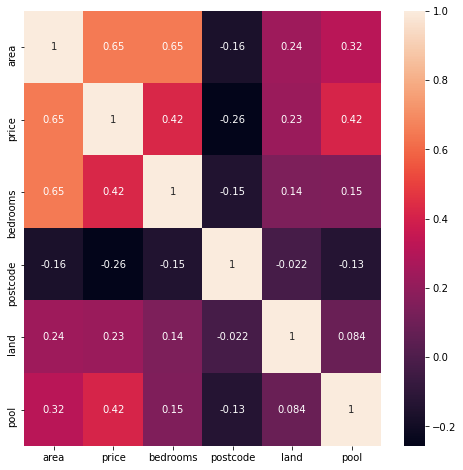

In [98]:
plt.figure(figsize=(8,8))
sns.heatmap(df2.corr(), annot=True)

In [103]:
# Add new column zone (region)
conditions = [ (1000 <= df2['postcode']) & (df2['postcode'] < 1300),
              ((1300 <= df2['postcode']) & (df2['postcode'] < 1500))| 
              ((4000 <= df2['postcode']) & (df2['postcode'] < 8000)),
              ((1500 <= df2['postcode']) & (df2['postcode'] < 4000))| 
              ((8000 <= df2['postcode']) & (df2['postcode'] < 10000))]

values = ['brussels', 'wallonia','flanders']
df2['region'] = np.select(conditions, values)
print(df2['region'].value_counts())

flanders    4368
wallonia    3074
brussels     562
Name: region, dtype: int64


In [104]:
df2_region = pd.get_dummies(data=df2['region'], columns=values)

In [109]:
df3 = pd.concat([df2,df2_region], axis=1)
df3.head()

,area,price,status,bedrooms,postcode,land,pool,subtype,region,brussels,flanders,wallonia
0,123.0,200000,good,2.0,3294,429.0,False,house,flanders,0,1,0
3,255.0,698000,just renovated,4.0,2070,1210.0,False,villa,flanders,0,1,0
4,234.0,499000,as new,5.0,8800,744.0,False,villa,flanders,0,1,0
5,219.0,717000,as new,4.0,8000,760.0,False,house,flanders,0,1,0
6,156.0,429000,good,4.0,8800,419.0,False,villa,flanders,0,1,0


<AxesSubplot:>

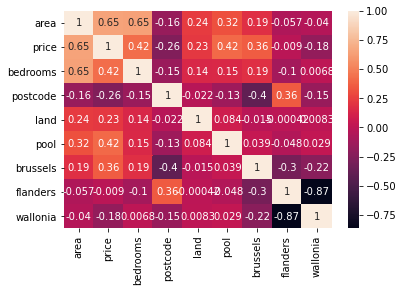

In [111]:
sns.heatmap(df3.corr(), annot=True)

In [115]:
df3_status = pd.get_dummies(data=df2['status'])
df3_status.head(20)

,as new,good,just renovated,not specified,to be done up,to renovate,to restore
0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0
6,0,1,0,0,0,0,0
7,0,1,0,0,0,0,0
8,0,1,0,0,0,0,0
9,0,1,0,0,0,0,0
10,1,0,0,0,0,0,0
13,0,0,0,0,0,1,0


house         5771
villa         1027
mixed          243
apartment      234
exceptiona     233
mansion        174
town            92
country         87
bungalow        59
farmhouse       28
manor           22
castle          15
chalet          12
other            7
Name: subtype, dtype: int64

In [27]:
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)
degree = 1
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,y_train)
print(polyreg.score(X_train,y_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#plt.scatter(X_test,y_test)
#plt.scatter(X_test, polyreg.predict(X_test), color='r')
#plt.show()
print(polyreg.score(X_test, y_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').